# <center> **VISUALIZATION**

## **I) IMPORTS**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## **II) DATASETS**

In [4]:
# ratings dataset loading: 
ratings = pd.read_parquet("C://Users/barba/Case_studies/Cinema_recommender/cleaned_data/ratings.parquet", engine='pyarrow')
movies = pd.read_parquet("C://Users/barba/Case_studies/Cinema_recommender/cleaned_data/movies.parquet", engine='pyarrow')
genres = pd.read_parquet("C://Users/barba/Case_studies/Cinema_recommender/cleaned_data/genres.parquet", engine='pyarrow')
directors = pd.read_parquet("C://Users/barba/Case_studies/Cinema_recommender/cleaned_data/directors.parquet", engine='pyarrow')
actors = pd.read_parquet("C://Users/barba/Case_studies/Cinema_recommender/cleaned_data/actors.parquet", engine='pyarrow')

## **III) GENERAL**

In [6]:
movies.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,region,title,detected_language
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,FR,Kate et Léopold,en
1,tt0036606,"Another Time, Another Place","Another Time, Another Place",1983,118,FR,Les Coeurs captifs,en
2,tt0038687,Let There Be Light,Let There Be Light,1980,58,FR,Que la lumière soit,en
3,tt0048550,Rendez-vous of the Docks,Le rendez-vous des quais,1990,75,FR,Le rendez-vous des quais,fr
4,tt0065530,Le cercle des passions,Le cercle des passions,1983,108,FR,Le cercle des passions,fr


In [12]:
# Creating decade column 
eighties = [i for i in range(1980, 1990)]
nineties = [i for i in range(1990, 2000)]
twenties = [i for i in range(2000, 2010)]
twenty_tens = [i for i in range(2010, 2020)]
twenty_twenties = [i for i in range(2020, 2030)]
movies['decade'] = movies['startYear'].apply(lambda x: '1980s' if x in eighties 
                                             else ('1990s' if x in nineties 
                                                   else ('2000s' if x in twenties 
                                                         else ('2010s' if x in twenty_tens 
                                                               else ('2020s' if x in twenty_twenties 
                                                                     else 'Other')))))

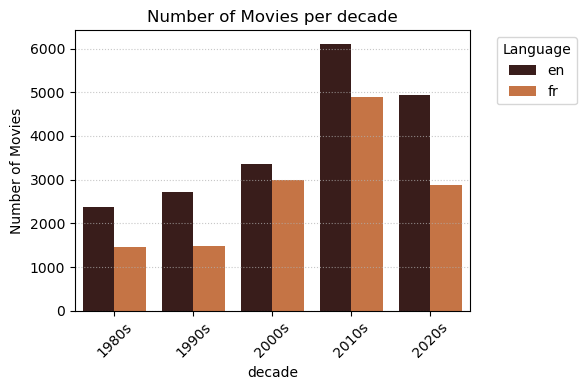

In [30]:
# Visualization of number of movies per decade, colored by detected language
plt.figure(figsize=(6,4))
grouped = movies.groupby(['decade', 'detected_language']).size().reset_index(name='counts')
sns.barplot(data=grouped,
            x='decade',
            y='counts',
            hue='detected_language',
            palette={'en': '#3e1916', 'fr': '#da6e30'},
            order=['1980s', '1990s', '2000s', '2010s', '2020s'])
plt.title('Number of Movies per decade')
plt.xlabel('decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='dotted', alpha=0.7)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# remark : we can see that the french cinema is flourishing and rising in the 21st century, reaching almost the english cinema in number of movies produced in the 2000s and 2010s. 
# A good sign for our client "Cinema Etoile La Creuse"!

## **IV FRENCH VS ENGLISH MOVIE STATISTICS**

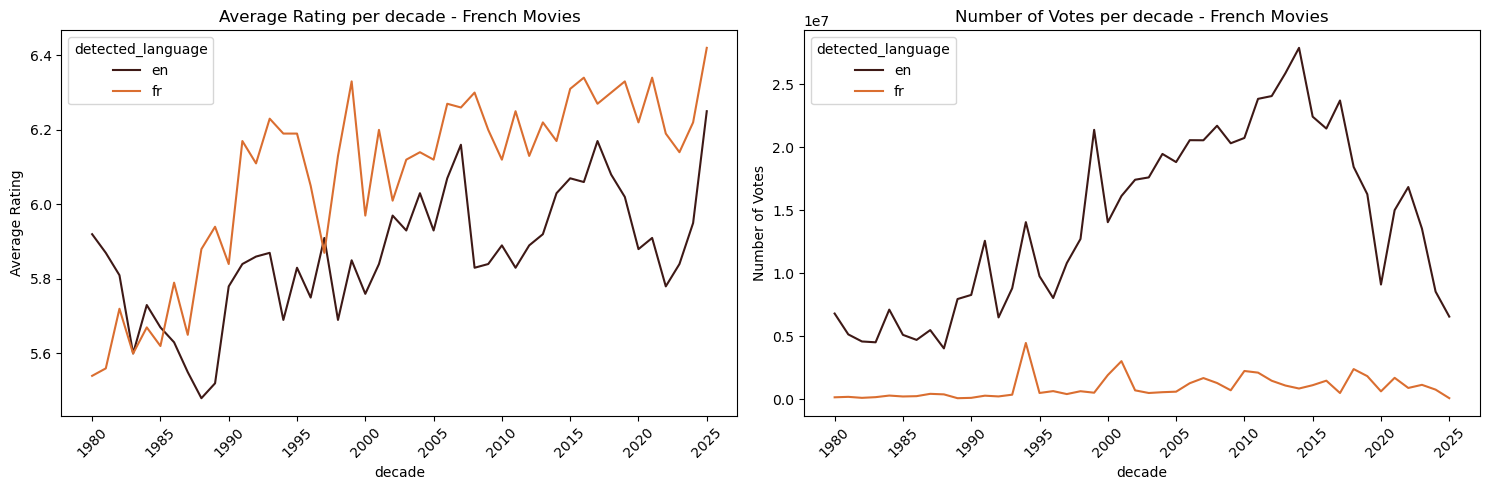

In [97]:
# plot two graphs (French movies) of average rating and number of votes per decade
grouped = (pd.merge(movies, ratings, on='tconst')
                .groupby(['startYear', 'detected_language'])
                .agg({'averageRating': 'mean', 'numVotes': 'sum'})
                .round(2)
                .reset_index())
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Average Rating plot
sns.lineplot(data=grouped,   
            x='startYear',
            y='averageRating',
            hue='detected_language',
            palette={'en': '#3e1916', 'fr': '#da6e30'},
            ax=axes[0])
axes[0].set_title('Average Rating per decade - French Movies')
axes[0].set_xlabel('decade')    
axes[0].set_ylabel('Average Rating')
axes[0].tick_params(axis='x', rotation=45)
# use set_xticks instead of set_xlim to avoid "too many values to unpack" and replace comprehension with list(range(...))
axes[0].set_xticks(list(range(1980, 2026, 5)))
# Number of Votes plot
sns.lineplot(data=grouped,
            x='startYear',
            y='numVotes',
            hue='detected_language',
            palette={'en': '#3e1916', 'fr': '#da6e30'},
            ax=axes[1])
axes[1].set_title('Number of Votes per decade - French Movies')
axes[1].set_xlabel('decade')    
axes[1].set_ylabel('Number of Votes')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xticks(list(range(1980, 2026, 5)))
plt.tight_layout()
plt.show()

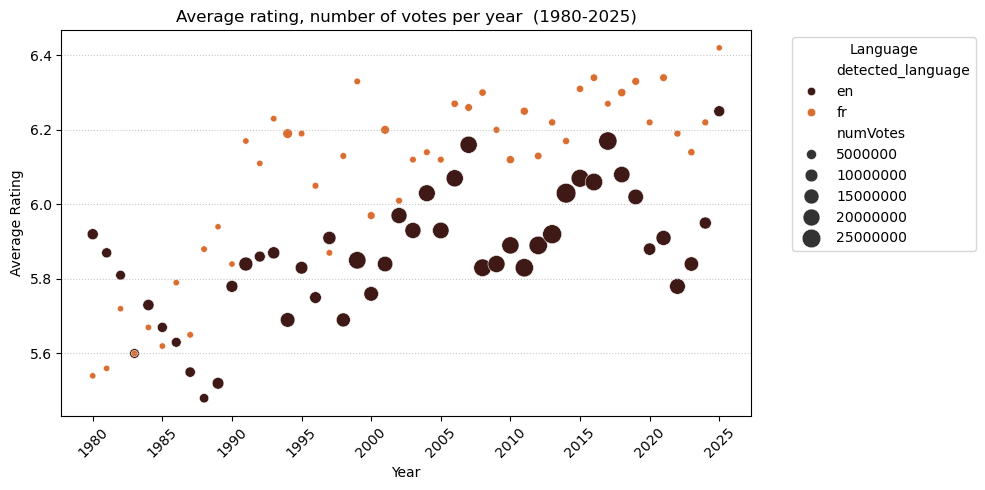

In [98]:
# Scatterplot of average rating vs number of votes per year, colored by detected language
grouped = (pd.merge(movies, ratings, on='tconst')
                .groupby(['startYear','detected_language'])
                .agg({'averageRating': 'mean', 'numVotes': 'sum'})
                .round(2)
                .reset_index())
plt.figure(figsize=(10, 5))
sns.scatterplot(data=grouped,
                x='startYear',
                y='averageRating',
                hue= 'detected_language',
                palette={'en': '#3e1916', 'fr': '#da6e30'},
                size='numVotes',
                sizes=(20, 200))
plt.title('Average rating, number of votes per year  (1980-2025)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks([i for i in range(1980, 2026, 5)], rotation=45)
plt.grid(axis='y', linestyle='dotted', alpha=0.7)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **OBSERVATIONS**

* The average rating looks the same between french and english movies and stable along five decades.   
* The number of votes is a huge difference between the two cinemas.  
* English movie are more popular and have a huge audience compared to french cinema. 
* English audience is also familiar (binge user) with Imdb platforms 

## **V GENRE ANALYSIS**

In [100]:
pd.merge(movies, genres, on='tconst').head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,region,title,detected_language,decade,genres
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,FR,Kate et Léopold,en,2000s,Comedy
1,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,FR,Kate et Léopold,en,2000s,Fantasy
2,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,FR,Kate et Léopold,en,2000s,Romance
3,tt0036606,"Another Time, Another Place","Another Time, Another Place",1983,118,FR,Les Coeurs captifs,en,1980s,Drama
4,tt0036606,"Another Time, Another Place","Another Time, Another Place",1983,118,FR,Les Coeurs captifs,en,1980s,War


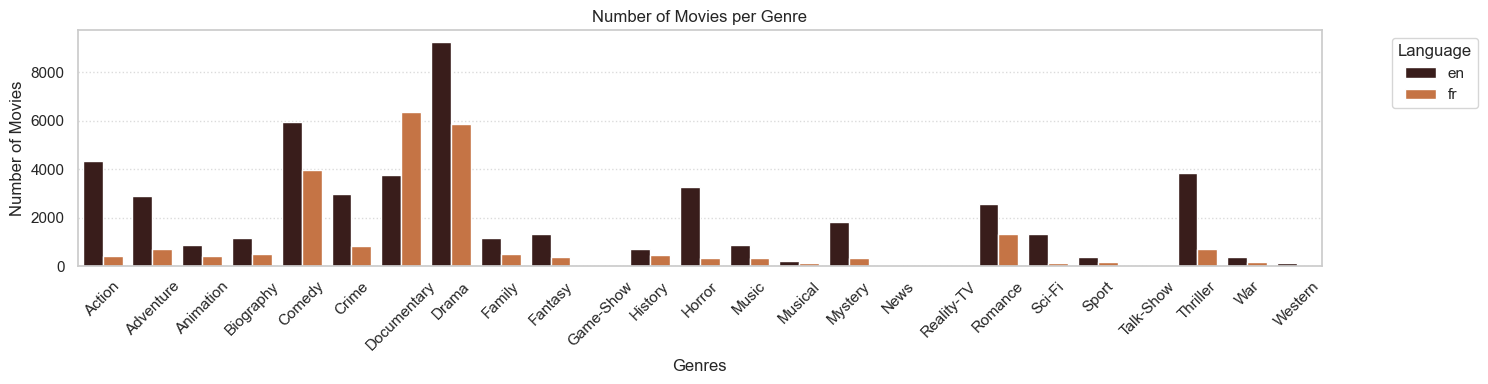

In [153]:
grouped = pd.merge(movies, genres, on='tconst').groupby(['genres', 'detected_language']).size().reset_index(name='counts')
plt.figure(figsize=(15,4))
sns.barplot(data=grouped,
            x= 'genres',
            y='counts',
            hue='detected_language',
            palette={'en': '#3e1916', 'fr': '#da6e30'}
            )
plt.title('Number of Movies per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='dotted', alpha=0.7)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* **!!!! Two genres can have movies in common  !!!!**
* French cinema produces more comedy, documentary and drama movies. 
* French cinema produces more documentaries than Hollywood (the lion share of English movies)
* Hollywood produces more thrillers, adventure, action and horror movies. 

In [ ]:
table_movies_genres =pd.merge(movies, genres, on='tconst')[['tconst', 'originalTitle', 'genres', 'runtimeMinutes' ,'detected_language', 'startYear', 'decade']]
table_movies_genres_ratings = pd.merge(table_movies_genres, ratings, on='tconst')
table_movies_genres_ratings

In [ ]:
# compute mean and count for `averageRating` and `numVotes` per genre, language and year
# use named aggregation so columns are clear and easy to use downstream
grouped = table_movies_genres_ratings.groupby(
    ['genres', 'detected_language', 'decade']).agg(
        averageRating_mean=('averageRating', 'mean'),
        numVotes_count=('numVotes', 'count')
        ).reset_index().round(2)
grouped

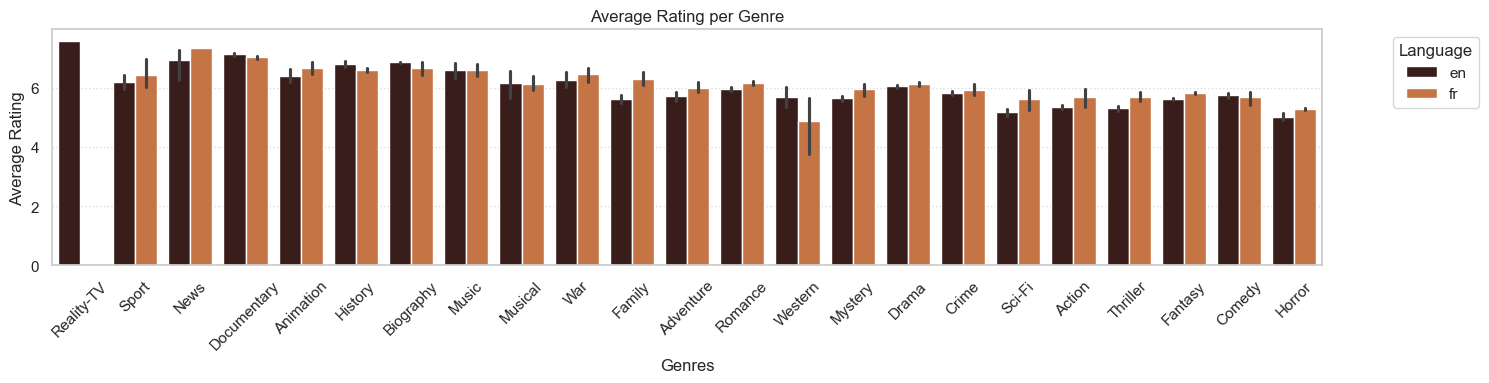

In [156]:
plt.figure(figsize=(15,4))
sns.barplot(data=grouped.sort_values(by='averageRating_mean', ascending=False),
            x= 'genres',
            y='averageRating_mean',
            hue='detected_language',
            palette={'en': '#3e1916', 'fr': '#da6e30'}
            )
plt.title('Average Rating per Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='dotted', alpha=0.7)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

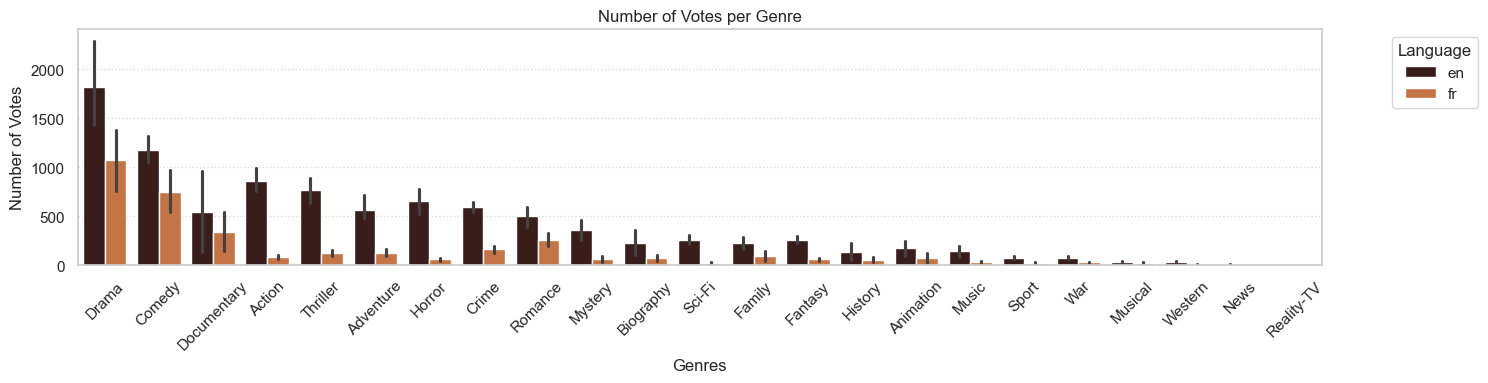

In [157]:
plt.figure(figsize=(15,4))
sns.barplot(data=grouped.sort_values(by='numVotes_count', ascending=False),
            x= 'genres',
            y='numVotes_count',
            hue='detected_language',
            palette={'en': '#3e1916', 'fr': '#da6e30'}
            )
plt.title('Number of Votes per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='dotted', alpha=0.7)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **VI-MOVIES ANALYSIS**

#### **1) FRENCH CINEMA MOVIES**

In [ ]:
# Top rated French movies excluding Documentaries 
high_rating_fr= table_movies_genres_ratings[(table_movies_genres_ratings['detected_language']== 'fr') 
                                            & ~(table_movies_genres_ratings['genres']=='Documentary')][['originalTitle',
                                                                                                         'startYear',
                                                                                                         'genres',
                                                                                                         'averageRating', 
                                                                                                         'numVotes']].sort_values(by='averageRating',
                                                                                                                                  ascending=False)
high_rating_fr.drop_duplicates(subset=['originalTitle'])

,originalTitle,startYear,genres,averageRating,numVotes
42865,Dans La Maison Du Capitaine,2018,Thriller,9.5,10
60241,Le sacre de l'été,2018,Drama,9.4,19
36246,Impionçable,2020,Drama,9.3,104
59507,Stromae: Racine Carrée - Live,2015,Music,9.3,42
55138,Le Monde de Gaston Rébuffat,2009,Biography,9.2,6
...,...,...,...,...,...
15419,Le jour et la nuit,1997,Drama,1.9,1221
20085,La pension des surdoués,1981,Comedy,1.9,36
52361,À Propos du Code,2015,Comedy,1.7,14
37822,Le baltringue,2010,Action,1.7,388


In [242]:
# Most popular French movies by number of votes
high_popular_fr= table_movies_genres_ratings[(table_movies_genres_ratings['detected_language']== 'fr') 
                                            & ~(table_movies_genres_ratings['genres']=='Documentary')][['originalTitle',
                                                                                                         'startYear',
                                                                                                         'genres',
                                                                                                         'averageRating', 
                                                                                                         'numVotes']].sort_values(by='numVotes',
                                                                                                                                  ascending=False)
high_popular_fr.drop_duplicates(subset=['originalTitle'])

,originalTitle,startYear,genres,averageRating,numVotes
12159,Forrest Gump,1994,Drama,8.8,2450488
12417,Léon,1994,Drama,8.5,1334599
41649,Intouchables,2011,Drama,8.5,1008589
33962,Dune: Part One,2021,Drama,8.0,1005514
25476,Ratatouille,2007,Animation,8.1,920798
...,...,...,...,...,...
52208,Toujours possible,2025,Comedy,6.0,6
55138,Le Monde de Gaston Rébuffat,2009,Biography,9.2,6
61568,Céline sur les plaines,2008,Music,6.4,6
53324,Géniales!,2025,Animation,5.0,6


#### **2) MOVIES LENGTH**

,tconst,originalTitle,genres,runtimeMinutes,detected_language,startYear,decade,averageRating,numVotes
0,tt0035423,Kate & Leopold,Comedy,118,en,2001,2000s,6.4,93042
1,tt0035423,Kate & Leopold,Fantasy,118,en,2001,2000s,6.4,93042
2,tt0035423,Kate & Leopold,Romance,118,en,2001,2000s,6.4,93042
3,tt0036606,"Another Time, Another Place",Drama,118,en,1983,1980s,6.4,378
4,tt0036606,"Another Time, Another Place",War,118,en,1983,1980s,6.4,378
...,...,...,...,...,...,...,...,...,...
65025,tt9907782,Eight for Silver,Mystery,111,en,2021,2020s,6.2,22109
65026,tt9907782,Eight for Silver,Fantasy,111,en,2021,2020s,6.2,22109
65027,tt9907782,Eight for Silver,Horror,111,en,2021,2020s,6.2,22109
65028,tt9907782,Eight for Silver,Mystery,111,en,2021,2020s,6.2,22109


In [258]:
# change dtype of runtimeMinutes to integer
table_movies_genres_ratings['runtimeMinutes'] = table_movies_genres_ratings['runtimeMinutes'].astype('Int64')
table_movies_genres_ratings['runtimeMinutes'].describe().round(2)
# remove outliers for better visualization
table_movies_genres_ratings = table_movies_genres_ratings[table_movies_genres_ratings['runtimeMinutes'] <= 300]

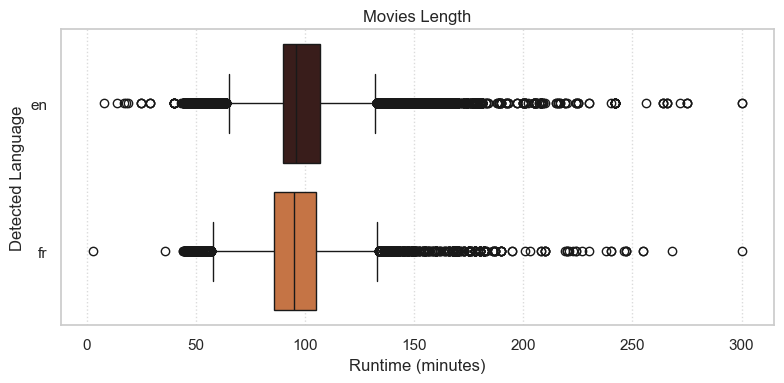

In [263]:
# Visualization of movie lengths by language
# ensure runtime is numeric
plt.figure(figsize=(8,4))
# horizontal boxplots: runtime on x, language on y
sns.boxplot(data=table_movies_genres_ratings, 
            x='runtimeMinutes',
            y = 'detected_language',
            hue='detected_language',
            palette={'en': '#3e1916', 'fr': '#da6e30'})
plt.title('Movies Length')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Detected Language')
plt.grid(axis='x', linestyle='dotted', alpha=0.7)
plt.tight_layout()
plt.show();


## **VII-FRENCH MOVIES & DIRECTORS** 

#### **1) POPULAR DIRECTORS**

In [206]:
from datetime import datetime as dt
currentYear = dt.now().year

directors_full =pd.merge(table_movies_genres_ratings.drop(columns=['genres']), directors, on='tconst')
directors_full.drop_duplicates(subset=['tconst'], inplace=True)
directors_full['deathYear'] = directors_full['deathYear'].fillna(currentYear)
directors_full['age'] = directors_full['deathYear'] - directors_full['birthYear']
directors_full

,tconst,originalTitle,runtimeMinutes,detected_language,startYear,decade,averageRating,numVotes,nconst,category,primaryName,birthYear,deathYear,age
0,tt0035423,Kate & Leopold,118,en,2001,2000s,6.4,93042,nm0003506,director,James Mangold,1963,2025,62
3,tt0036606,"Another Time, Another Place",118,en,1983,1980s,6.4,378,nm0705535,director,Michael Radford,1946,2025,79
5,tt0048550,Le rendez-vous des quais,75,fr,1990,1990s,6.6,69,nm0139569,director,Paul Carpita,1922,2009,87
6,tt0065530,Le cercle des passions,108,fr,1983,1980s,6.4,79,nm0195327,director,Claude d'Anna,1945,2025,80
7,tt0067100,Firecracker,77,en,1981,1980s,5.6,1019,nm0379391,director,Cirio H. Santiago,1936,2008,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70102,tt9896916,The Pilgrim's Progress,108,en,2019,2010s,6.5,1047,nm4775123,director,Robert Fernandez,<NA>,2025,<NA>
70114,tt9898858,Coffee & Kareem,88,en,2020,2020s,5.2,15181,nm0236226,director,Michael Dowse,1973,2025,52
70117,tt9904530,Scream Returns,48,en,2018,2010s,5.7,98,nm10533411,director,Jad Charaf,<NA>,2025,<NA>
70119,tt9907782,Eight for Silver,111,en,2021,2020s,6.2,22109,nm1193346,director,Sean Ellis,1970,2025,55


In [207]:
directors_full[directors_full['detected_language']=='fr'][['primaryName', 
                                                            'originalTitle', 
                                                            'startYear', 
                                                            'averageRating', 
                                                            'numVotes',
                                                            'age'
                                                            ]].sort_values(by = 'numVotes', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes,age
0,Robert Zemeckis,Forrest Gump,1994,8.8,2450488,74
1,Luc Besson,Léon,1994,8.5,1334599,66
2,Olivier Nakache,Intouchables,2011,8.5,1008589,52
3,Denis Villeneuve,Dune: Part One,2021,8.0,1005514,58
4,Brad Bird,Ratatouille,2007,8.1,920798,68
...,...,...,...,...,...,...
6788,Jacques Ouaniche,Toujours possible,2025,6.0,6,<NA>
6789,Jean Chérasse,La prise du pouvoir par Philippe Pétain,1980,6.2,6,93
6790,Lilou Lemaire,Groupe de protection des Mineurs,2022,9.8,6,<NA>
6791,Julie Robert,"CHEMS : sexe, drogue et dépendance - Le docume...",2024,7.0,6,<NA>


#### **2) HIGHLY RATED DIRECTORS**

In [208]:
directors_full[directors_full['detected_language']=='fr'][['primaryName', 
                                                            'originalTitle', 
                                                            'startYear', 
                                                            'averageRating', 
                                                            'numVotes',
                                                            'age'
                                                            ]].sort_values(by = 'averageRating', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes,age
0,Steve Vilhem,"Islande, Sur les Traces de la Démocratie",2024,9.8,16,<NA>
1,Lilou Lemaire,Groupe de protection des Mineurs,2022,9.8,6,<NA>
2,Nadir Dendoune,Palestine,2011,9.6,9,<NA>
3,Lilou Lemaire,Dites à l'avenir que nous arrivons !,2025,9.6,6,<NA>
4,Thirumalaiyuraan s Sabarathnam,Dans La Maison Du Capitaine,2018,9.5,10,<NA>
...,...,...,...,...,...,...
6788,J.P. Fortin,À Propos du Code,2015,1.7,14,<NA>
6789,Atiq Rahimi,"Afghanistan, un état impossible?",2002,1.6,44,63
6790,Houda Benyamina,Toutes pour une,2024,1.5,723,45
6791,Bernard-Henri Lévy,Le serment de Tobrouk,2012,1.2,485,77


#### **3) PROLIFIC DIRECTORS**

In [214]:
# We calculate the prolificity of directors 
prolific_fr = (directors_full[directors_full["detected_language"] == "fr"]
			   .groupby('primaryName')
			   .size()
			   .reset_index(name='number_of_movies')
			   .sort_values(by='number_of_movies', ascending=False)
			   .reset_index(drop=True))
prolific_fr.head(10)

,primaryName,number_of_movies
0,Jean-Pierre Mocky,31
1,Raúl Ruiz,22
2,Patrice Leconte,20
3,Claude Lelouch,18
4,André Téchiné,18
5,Paul Vecchiali,17
6,Claude Chabrol,16
7,Pierre Jolivet,16
8,Philippe Garrel,16
9,Jean-Luc Godard,16


## **VII-HOLLYWOOD MOVIES & DIRECTORS** 

#### **1) POPULAR DIRECTORS**

In [190]:
directors_full[directors_full['detected_language']=='en'][['primaryName', 
                                                            'originalTitle', 
                                                            'startYear', 
                                                            'averageRating', 
                                                            'numVotes'
                                                            ]].sort_values(by = 'numVotes', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes
0,Frank Darabont,The Shawshank Redemption,1994,9.3,3134860
1,Christopher Nolan,The Dark Knight,2008,9.1,3110694
2,Christopher Nolan,Inception,2010,8.8,2764692
3,David Fincher,Fight Club,1999,8.8,2550112
4,Quentin Tarantino,Pulp Fiction,1994,8.8,2395545
...,...,...,...,...,...
16392,Alexis de Favitski,Tollund: The Enigma of the Swamp Mummy,2025,7.4,6
16393,Lilou Lemaire,Mission COVID,2020,8.2,6
16394,Moussa Diop,"Golden Fish, African Fish",2018,7.4,6
16395,Andrius Arutiunian,End Pull,2025,5.2,5


#### **2) HIGHLY RATED DIRECTORS**

In [191]:
directors_full[directors_full['detected_language']=='en'][['primaryName', 
                                                            'originalTitle', 
                                                            'startYear', 
                                                            'averageRating', 
                                                            'numVotes'
                                                            ]].sort_values(by = 'averageRating', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes
0,Ben Ahmed Hamdi,The Last Nomads,2016,9.7,11
1,Mohamed Jamel Nefzi,El-Alaouine: Qarn w'Thalathoun,2019,9.7,32
2,Arthur Bourbon,We the Surfers,2024,9.6,10
3,Samir Habchi,Nohad Al Chami: A Sign of Faith,2025,9.6,101
4,Masahiro Hayakawa,Atlas Mountain: Barbary Macaques - Childcaring...,2015,9.5,16
...,...,...,...,...,...
16392,Brett Kelly,Jurassic Shark,2012,1.5,5197
16393,Donald Farmer,Shark Exorcist,2014,1.4,2164
16394,Brett Kelly,Thunderstorm: The Return of Thor,2011,1.4,496
16395,Danil Andreev,Interstelar 2: Operation Terra 2040,2016,1.4,375


#### **!!!!Observation!!!!**
* Movies highly rated are generallly recent and with few votes. 
* The Shawshank Redemtion however though it is highly popular but it is highly rated too. 

#### **3) PROLIFIC DIRECTORS**

In [215]:
# We calculate the prolificity of directors 
prolific_en = (directors_full[directors_full["detected_language"] == "en"]
			   .groupby('primaryName')
			   .size()
			   .reset_index(name='number_of_movies')
			   .sort_values(by='number_of_movies', ascending=False)
			   .reset_index(drop=True))
prolific_en.head(10)

,primaryName,number_of_movies
0,Woody Allen,26
1,Steven Soderbergh,23
2,Steven Spielberg,21
3,Clint Eastwood,21
4,Tyler Perry,17
5,Fred Olen Ray,17
6,Martin Scorsese,17
7,Ron Howard,17
8,Wes Craven,16
9,Rob Reiner,16


## **IX-HOLLYWOOD ACTORS** 

In [217]:
actors_full = pd.merge(table_movies_genres_ratings.drop(columns=['genres']), actors, on='tconst')
actors_full = actors_full.drop_duplicates(subset=['tconst']) 
actors_full

,tconst,originalTitle,runtimeMinutes,detected_language,startYear,decade,averageRating,numVotes,nconst,category,primaryName,birthYear,deathYear
0,tt0035423,Kate & Leopold,118,en,2001,2000s,6.4,93042,nm0000212,actress,Meg Ryan,1961,<NA>
30,tt0036606,"Another Time, Another Place",118,en,1983,1980s,6.4,378,nm0517642,actress,Phyllis Logan,1956,<NA>
50,tt0038687,Let There Be Light,58,en,1980,1980s,7.4,2153,nm0404158,actor,Walter Huston,1884,1950
52,tt0048550,Le rendez-vous des quais,75,fr,1990,1990s,6.6,69,nm0560833,actor,André Maufray,<NA>,<NA>
62,tt0065530,Le cercle des passions,108,fr,1983,1980s,6.4,79,nm0312575,actor,Giuliano Gemma,1938,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598900,tt9896916,The Pilgrim's Progress,108,en,2019,2010s,6.5,1047,nm0861657,actor,David Thorpe,<NA>,<NA>
599116,tt9898858,Coffee & Kareem,88,en,2020,2020s,5.2,15181,nm1159180,actor,Ed Helms,1974,<NA>
599146,tt9904530,Scream Returns,48,en,2018,2010s,5.7,98,nm10532780,actor,Arthur Lang,<NA>,<NA>
599166,tt9907782,Eight for Silver,111,en,2021,2020s,6.2,22109,nm2933542,actor,Boyd Holbrook,1981,<NA>


#### **1) POPULAR ACTORS & ACTRESS**

In [ ]:
# Male actors Hollywood
actors_full[(actors_full['detected_language']=='en') & (actors_full['category']=='actor')][['primaryName', 
                                                                                            'originalTitle',     
                                                                                            'startYear', 
                                                                                            'averageRating', 
                                                                                            'numVotes'
                                                                                        ]].sort_values(by = 'numVotes', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes
0,Tim Robbins,The Shawshank Redemption,1994,9.3,3134860
1,Christian Bale,The Dark Knight,2008,9.1,3110694
2,Leonardo DiCaprio,Inception,2010,8.8,2764692
3,Brad Pitt,Fight Club,1999,8.8,2550112
4,John Travolta,Pulp Fiction,1994,8.8,2395545
...,...,...,...,...,...
9822,Nick Bolton,Wild Medicine: Animals' Superpowers,2018,6.6,7
9823,Seventeen,Seventeen World Tour [New_] in Japan: Live Vie...,2025,7.3,7
9824,Antoine Duléry,Mission COVID,2020,8.2,6
9825,Eddie Andre,Fight the Kickboxer,1990,4.2,6


In [ ]:
# Female actors hollywood
actors_full[(actors_full['detected_language']=='en') & (actors_full['category']=='actress')][['primaryName', 
                                                                                            'originalTitle',     
                                                                                            'startYear', 
                                                                                            'averageRating', 
                                                                                            'numVotes'
                                                                                        ]].sort_values(by = 'numVotes', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes
0,Jodie Foster,The Silence of the Lambs,1991,8.6,1688794
1,Daisy Ridley,Star Wars: Episode VII - The Force Awakens,2015,7.7,1015135
2,Natalie Portman,Black Swan,2010,8.0,877487
3,Jennifer Lawrence,The Hunger Games: Catching Fire,2013,7.5,763295
4,Hilary Swank,Million Dollar Baby,2004,8.1,758481
...,...,...,...,...,...
4954,Teresa Ovídio,Voyage a Hemmsted,2007,8.6,7
4955,Clotilde Hesme,Upon Her Lips: Hold Me Tight,2024,6.6,7
4956,Deskit Angmo,Songs of the Water Spirits,2020,8.6,6
4957,Nora Arnezeder,Hell in Paradise,2025,7.2,6


#### **2) HIGHLY RATED ACTORS & ACTRESS**

In [225]:
actors_full[(actors_full['detected_language']=='en') & (actors_full['category']=='actor')][['primaryName', 
                                                                                            'originalTitle',     
                                                                                            'startYear', 
                                                                                            'averageRating', 
                                                                                            'numVotes'
                                                                                        ]].sort_values(by = 'averageRating', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes
0,Arthur Bourbon,We the Surfers,2024,9.6,10
1,Xudong Zhao,Nan shen youxi,2022,9.3,9
2,Tim Robbins,The Shawshank Redemption,1994,9.3,3134860
3,Stoyan Aleksiev,Naive,2008,9.3,10
4,Rudi Dharmalingam,The Collaborator,2024,9.2,56
...,...,...,...,...,...
9822,Joe Pantoliano,Robot in the Family,1993,1.6,363
9823,Fred Estrada,The Legend of Diablo,2003,1.5,155
9824,Jody Haucke,Rise of the Black Bat,2012,1.4,1000
9825,Ray Besharah,Thunderstorm: The Return of Thor,2011,1.4,496


In [223]:
actors_full[(actors_full['detected_language']=='en') & (actors_full['category']=='actress')][['primaryName', 
                                                                                            'originalTitle',     
                                                                                            'startYear', 
                                                                                            'averageRating', 
                                                                                            'numVotes'
                                                                                        ]].sort_values(by = 'averageRating', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes
0,Julia Kassar,Nohad Al Chami: A Sign of Faith,2025,9.6,101
1,Helen Buday,Passing Through,2022,9.4,13
2,Yasmine Al Massri,I Was a Stranger,2024,9.3,8445
3,Cláudia Barbot,I Do Not Know What City Happens in His Eyes,2019,9.3,15
4,Rosie Benton,Stranger Things: The First Shadow - West End/B...,2025,9.2,277
...,...,...,...,...,...
4954,Juana Arias,Android Insurrection,2012,1.8,630
4955,Paris Hilton,National Lampoon's Pledge This,2006,1.7,19152
4956,Jennifer Barnes,Avenging Force: The Scarab,2010,1.6,394
4957,Emanuelle Carriere,Jurassic Shark,2012,1.5,5197


#### **3) PROLIFIC ACTORS & ACTRESS**

In [228]:
# We calculate the prolificity of directors 
prolific_en = (actors_full[(actors_full['detected_language']=='en') & (actors_full['category']=='actor')]
			   .groupby('primaryName')
			   .size()
			   .reset_index(name='number_of_movies')
			   .sort_values(by='number_of_movies', ascending=False)
			   .reset_index(drop=True))
prolific_en.head(10)

,primaryName,number_of_movies
0,Nicolas Cage,52
1,John Travolta,33
2,Tom Hanks,32
3,Bruce Willis,29
4,Robert De Niro,29
5,Johnny Depp,28
6,Michael Caine,27
7,George Clooney,25
8,Liam Neeson,25
9,Steve Martin,24


In [227]:
# We calculate the prolificity of directors 
prolific_en = (actors_full[(actors_full['detected_language']=='en') & (actors_full['category']=='actress')]
			   .groupby('primaryName')
			   .size()
			   .reset_index(name='number_of_movies')
			   .sort_values(by='number_of_movies', ascending=False)
			   .reset_index(drop=True))
prolific_en.head(10)

,primaryName,number_of_movies
0,Meryl Streep,22
1,Nicole Kidman,19
2,Sandra Bullock,18
3,Demi Moore,14
4,Diane Keaton,13
5,Scarlett Johansson,13
6,Tilda Swinton,12
7,Julianne Moore,12
8,Naomi Watts,11
9,Sigourney Weaver,11


## **X-FRENCH ACTORS** 

#### **1) POPULAR ACTORS & ACTRESS**

In [229]:
# Male actors French cinema 
actors_full[(actors_full['detected_language']=='fr') & (actors_full['category']=='actor')][['primaryName', 
                                                                                            'originalTitle',     
                                                                                            'startYear', 
                                                                                            'averageRating', 
                                                                                            'numVotes'
                                                                                        ]].sort_values(by = 'numVotes', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes
0,Tom Hanks,Forrest Gump,1994,8.8,2450488
1,Jean Reno,Léon,1994,8.5,1334599
2,François Cluzet,Intouchables,2011,8.5,1008589
3,Timothée Chalamet,Dune: Part One,2021,8.0,1005514
4,Brad Garrett,Ratatouille,2007,8.1,920798
...,...,...,...,...,...
3576,Alain Hayot,Mains brunes sur la ville,2012,6.4,7
3577,Wilfried Blé,Dans la peau,2024,7.2,7
3578,Rufus,Téléphonie mobile: sommes-nous tous des cobayes?,2003,8.6,7
3579,Michel Delahaye,La prise du pouvoir par Philippe Pétain,1980,6.2,6


In [ ]:
# Female actors French cinema
actors_full[(actors_full['detected_language']=='fr') & (actors_full['category']=='actress')][['primaryName', 
                                                                                            'originalTitle',     
                                                                                            'startYear', 
                                                                                            'averageRating', 
                                                                                            'numVotes'
                                                                                        ]].sort_values(by = 'numVotes', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes
0,Audrey Tautou,Le fabuleux destin d'Amélie Poulain,2001,8.3,831587
1,Felicity Jones,Rogue One,2016,7.8,743727
2,Emily Blunt,A Quiet Place,2018,7.5,646687
3,Emily Blunt,A Quiet Place Part II,2020,7.2,315538
4,Sigourney Weaver,Alien: Resurrection,1997,6.2,288961
...,...,...,...,...,...
2254,Joséphine Jol,Froid dans le dos,2019,7.3,7
2255,Sarah Abicht,Les saisons de la danse,2025,5.8,7
2256,Olivia Ruiz,La vie rêvée de Nougaro,2022,7.8,7
2257,Marie Amiguet,"Vincent Munier, éternel émerveillé",2019,8.4,6


#### **2) HIGHLY RATED ACTORS & ACTRESS**

In [232]:
actors_full[(actors_full['detected_language']=='fr') & (actors_full['category']=='actor')][['primaryName', 
                                                                                            'originalTitle',     
                                                                                            'startYear', 
                                                                                            'averageRating', 
                                                                                            'numVotes'
                                                                                        ]].sort_values(by = 'numVotes', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes
0,Tom Hanks,Forrest Gump,1994,8.8,2450488
1,Jean Reno,Léon,1994,8.5,1334599
2,François Cluzet,Intouchables,2011,8.5,1008589
3,Timothée Chalamet,Dune: Part One,2021,8.0,1005514
4,Brad Garrett,Ratatouille,2007,8.1,920798
...,...,...,...,...,...
3576,Alain Hayot,Mains brunes sur la ville,2012,6.4,7
3577,Wilfried Blé,Dans la peau,2024,7.2,7
3578,Rufus,Téléphonie mobile: sommes-nous tous des cobayes?,2003,8.6,7
3579,Michel Delahaye,La prise du pouvoir par Philippe Pétain,1980,6.2,6


In [231]:
actors_full[(actors_full['detected_language']=='fr') & (actors_full['category']=='actress')][['primaryName', 
                                                                                            'originalTitle',     
                                                                                            'startYear', 
                                                                                            'averageRating', 
                                                                                            'numVotes'
                                                                                        ]].sort_values(by = 'averageRating', ascending = False).reset_index(drop=True)

,primaryName,originalTitle,startYear,averageRating,numVotes
0,Agnese Claisse,Amore Synthétique,2016,9.2,15
1,Lynda Benzemrane,Montre l'exemple!,2012,9.2,16
2,Dorine Hollier,Hôtel Ouest,1992,9.1,22
3,Rebecca Convenant,La vie sans Vincent,2001,9.0,13
4,Ute Lemper,Pierre qui brûle,1991,8.8,37
...,...,...,...,...,...
2254,Sylvia Pouget,Noni - Le fruit de l'espoir,2020,2.3,14
2255,Jena Romano,Voyeur.com,2000,2.1,623
2256,Charlotte Julian,La pension des surdoués,1981,1.9,36
2257,Audrey Rocard,À Propos du Code,2015,1.7,14


#### **3) PROLIFIC ACTORS & ACTRESS**

In [233]:
prolific_en = (actors_full[(actors_full['detected_language']=='fr') & (actors_full['category']=='actor')]
			   .groupby('primaryName')
			   .size()
			   .reset_index(name='number_of_movies')
			   .sort_values(by='number_of_movies', ascending=False)
			   .reset_index(drop=True))
prolific_en.head(10)

,primaryName,number_of_movies
0,Daniel Auteuil,37
1,Gérard Depardieu,35
2,Christian Clavier,24
3,Benoît Poelvoorde,24
4,Romain Duris,23
5,Vincent Lindon,23
6,Gérard Lanvin,23
7,Michel Serrault,23
8,Lambert Wilson,22
9,Richard Berry,22


In [234]:
prolific_en = (actors_full[(actors_full['detected_language']=='fr') & (actors_full['category']=='actress')]
			   .groupby('primaryName')
			   .size()
			   .reset_index(name='number_of_movies')
			   .sort_values(by='number_of_movies', ascending=False)
			   .reset_index(drop=True))
prolific_en.head(10)

,primaryName,number_of_movies
0,Isabelle Huppert,38
1,Catherine Deneuve,30
2,Karin Viard,23
3,Juliette Binoche,21
4,Nathalie Baye,21
5,Sophie Marceau,19
6,Sandrine Bonnaire,18
7,Sandrine Kiberlain,17
8,Ariane Ascaride,17
9,Josiane Balasko,17
